<h1 style='text-align:center'> A/B Test Analysis For The International On-line Store</h1>

#### Project description<br>
> You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.<br>

#### Description of the data<br>
**hypotheses dataset:**<br>
- Hypotheses — brief descriptions of the hypotheses<br>
- Reach — user reach, on a scale of one to ten<br>
- Impact — impact on users, on a scale of one to ten<br>
- Confidence — confidence in the hypothesis, on a scale of one to ten<br>
- Effort — the resources required to test a hypothesis, on a scale of one to ten.<br>
- The higher the Effort value, the more resource-intensive the test.<br>
**orders dataset:**<br>
- transactionId — order identifier<br>
- visitorId — identifier of the user who placed the order<br>
- date — of the order<br>
- revenue — from the order<br>
- group — the A/B test group that the user belongs to<br>
**visits dataset:**<br>
- date — date<br>
- group — A/B test group<br>
- visits — the number of visits on the date specified in the A/B test group specified<br>

#### Table of Contents
[Overview](#Overview)

[Data preprocessing](#Data-preprocessing)
#### Part 1. Prioritizing Hypotheses
- [Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.](#Apply-the-ICE-framework-to-prioritize-hypotheses.-Sort-them-in-descending-order-of-priority.)
- [Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.](#Apply-the-RICE-framework-to-prioritize-hypotheses.-Sort-them-in-descending-order-of-priority.)
- [Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.](#Show-how-the-prioritization-of-hypotheses-changes-when-you-use-RICE-instead-of-ICE.-Provide-an-explanation-for-the-changes.)

#### Part 2. A/B Test Analysis
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.<br>

Analyze the A/B test:
- [Graph cumulative revenue by group. Make conclusions and conjectures.](#Graph-cumulative-revenue-by-group.-Make-conclusions-and-conjectures.)
- [Graph cumulative average order size by group. Make conclusions and conjectures.](#Graph-cumulative-average-order-size-by-group.-Make-conclusions-and-conjectures.)
- [Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.](#Graph-the-relative-difference-in-cumulative-average-order-size-for-group-B-compared-with-group-A.-Make-conclusions-and-conjectures.)
- [Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.](#Calculate-each-group's-conversion-rate-as-the-ratio-of-orders-to-the-number-of-visits-for-each-day.-Plot-the-daily-conversion-rates-of-the-two-groups-and-describe-the-difference.-Draw-conclusions-and-make-conjectures.)
- [Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.](#Plot-a-scatter-chart-of-the-number-of-orders-per-user.-Make-conclusions-and-conjectures.)
- [Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.](#Calculate-the-95th-and-99th-percentiles-for-the-number-of-orders-per-user.-Define-the-point-at-which-a-data-point-becomes-an-anomaly.)
- [Plot a scatter chart of order prices. Make conclusions and conjectures.](#Plot-a-scatter-chart-of-order-prices.-Make-conclusions-and-conjectures.)
- [Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.](#Calculate-the-95th-and-99th-percentiles-of-order-prices.-Define-the-point-at-which-a-data-point-becomes-an-anomaly.)
- [Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.](#Find-the-statistical-significance-of-the-difference-in-conversion-between-the-groups-using-the-raw-data.-Make-conclusions-and-conjectures.)
- [Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.](#Find-the-statistical-significance-of-the-difference-in-average-order-size-between-the-groups-using-the-raw-data.-Make-conclusions-and-conjectures.)
- [Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.](#Find-the-statistical-significance-of-the-difference-in-conversion-between-the-groups-using-the-filtered-data.-Make-conclusions-and-conjectures.)
- [Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.](#Find-the-statistical-significance-of-the-difference-in-average-order-size-between-the-groups-using-the-filtered-data.-Make-conclusions-and-conjectures.)
- [Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.](#Make-a-decision-based-on-the-test-results.-The-possible-decisions-are:-1.-Stop-the-test,-consider-one-of-the-groups-the-leader.-2.-Stop-the-test,-conclude-that-there-is-no-difference-between-the-groups.-3.-Continue-the-test.)

<a id='Overview'></a>

#### "Overview"

In [44]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [45]:
hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')
#changing the settings to see not truncated values in 'Hypothesis' column
pd.options.display.max_colwidth = 120
display(hypotheses)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


`hypotheses` df is clear and ready to work with. There is no NaN or anything else to preprocess.

In [46]:
orders = pd.read_csv('orders_us.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
display(orders.head())
display(orders.tail())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A
1196,3936777065,2108080724,2019-08-15,3120.1,B


In [47]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 110.0 KB


In [48]:
# checking 0 values
len(orders[orders.revenue==0])

0

In [73]:
# checking for duplicates
orders.duplicated().sum()

0

In [49]:
visits = pd.read_csv('visits_us.csv')
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
display(visits.head())
display(visits.tail())

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,group,visits
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


In [50]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.8 KB


In [72]:
# checking for duplicates
visits.duplicated().sum()

0

Here I downloaded files, looked on their memory usage, column's data types, columns' names and optimized the data for analysis:<br>
- Changed data types from object to datetime64 in `visits` and `orders` dfs.<br>
- And didn't change data types from object to category in `visits` and `orders` dfs "group" columns, because later we need to apply 'max' to it.<br>

<a id='Data-preprocessing'></a>

#### "Data preprocessing"

In [51]:
#checking how may users we have in A and B groups
orders.group.value_counts()

B    640
A    557
Name: group, dtype: int64

In [52]:
#checking if the are users in both A and B groups
duplicated_users = orders.groupby('visitorId').agg({'group': 'nunique'}).reset_index()
#select users who belong to only one group
ordersClean = duplicated_users.query('group == 1')
#renewing our `orders` df
orders = orders[orders['visitorId'].isin(ordersClean.visitorId)]
orders.group.value_counts()

B    548
A    468
Name: group, dtype: int64

We deleted users that got in both groups to get more distinct and reliable results.

<a id='Apply-the-ICE-framework-to-prioritize-hypotheses.-Sort-them-in-descending-order-of-priority.'></a>

#### "Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority."

In [53]:
hypotheses['ICE'] = (hypotheses['Impact']*hypotheses['Confidence']/hypotheses['Effort']).round(1)
hypotheses.sort_values(by='ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.2
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.1
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0


The most promising hypotheses are 8, 0 and 7. Let's take into account how many users it will affect.

<a id='Apply-the-RICE-framework-to-prioritize-hypotheses.-Sort-them-in-descending-order-of-priority.'></a>

#### "Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority."

In [54]:
hypotheses['RICE'] = hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence']/hypotheses['Effort']
hypotheses.sort_values(by='RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.2,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.3,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.2,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.1,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.3,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0,3.0


Accordind to RICE version of prioritizing hypotheses the most strong ones still are 7, 0 and 2. 8 hypothesis is now on 5th  place (changed her place with hypothesis number 2), it's strong but doesn't influence many users.

<a id='Show-how-the-prioritization-of-hypotheses-changes-when-you-use-RICE-instead-of-ICE.-Provide-an-explanation-for-the-changes.'></a>

#### "Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes."

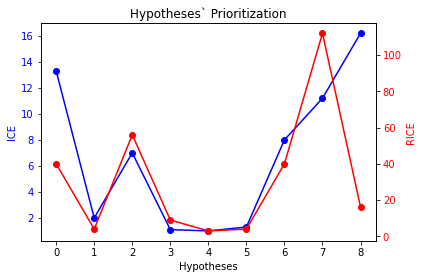

In [55]:
#graph results ICE and RICE prioritization versions
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

# Set the visualization title
plt.title('Hypotheses` Prioritization')

# Setting the labels titles and plotting them
ax_left.set_xlabel('Hypotheses')
ax_left.tick_params(axis='y', labelcolor='blue')
ax_left.set_ylabel('ICE', color='blue')
ax_right.tick_params(axis='y', labelcolor='red')
ax_right.set_ylabel('RICE', color='red')

ax_left.plot(hypotheses.ICE, color='blue', marker="o")
ax_right.plot(hypotheses.RICE, color='red', marker="o");

We have our winners 7, 0 (that have strong positions in both ratings), 2 (which took 2nd place due to RICE prioritization and 5th in ICE one) and 6 (that is on 4th place constantly). Other hypotheses plus or minus in the same places for both methods of prioritizing.

<a id='Graph-cumulative-revenue-by-group.-Make-conclusions-and-conjectures.'></a>

#### 'Graph cumulative revenue by-group. Make conclusions and conjectures.'

In [56]:
# making query for A group
orders_group_a = orders.loc[orders['group'] == 'A']
# counting number of orders and summing revenue per each day
orders_cum_A = orders_group_a.groupby('date').agg({'visitorId': 'count', 'revenue': 'sum'})
# computing cumulative values
orders_cum_A = orders_cum_A.cumsum()
# placing column names back on places
orders_cum_A = orders_cum_A.reset_index()
# and for time and place economy calculating average order size to answer next question
orders_cum_A['ave_oreder_size_A'] = orders_cum_A['revenue'] / orders_cum_A['visitorId']

# the same for B group
orders_group_b = orders.loc[orders['group'] == 'B']
orders_cum_B = orders_group_b.groupby('date').agg({'visitorId': 'count', 'revenue': 'sum'})
orders_cum_B = orders_cum_B.cumsum()
orders_cum_B = orders_cum_B.reset_index()
orders_cum_B['ave_oreder_size_B'] = orders_cum_B['revenue'] / orders_cum_B['visitorId']

#merging tables with A and B cumulative revenues
orders_cumsum = pd.merge(orders_cum_A, orders_cum_B, how='inner', on='date', suffixes=('_A', '_B'))
display(orders_cumsum.head())

,date,visitorId_A,revenue_A,ave_oreder_size_A,visitorId_B,revenue_B,ave_oreder_size_B
0,2019-08-01,23,2266.6,98.547826,17,967.2,56.894118
1,2019-08-02,42,3734.9,88.926190,40,3535.3,88.382500
2,2019-08-03,66,5550.1,84.092424,54,4606.9,85.312963
3,2019-08-04,77,6225.6,80.851948,68,6138.5,90.272059
4,2019-08-05,99,7623.6,77.006061,89,7587.8,85.256180


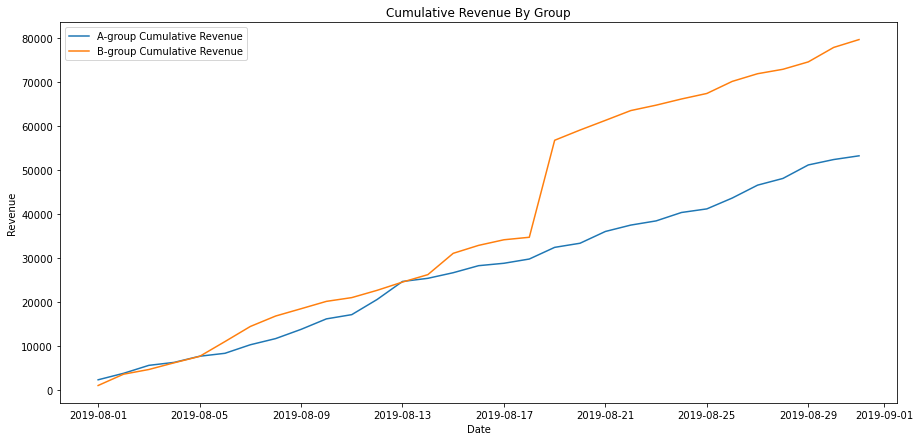

In [58]:
#plotting results
plt.figure(figsize=(15,7))
# Plotting the group A revenue graph 
plt.plot(orders_cumsum['date'], orders_cumsum['revenue_A'], label='A-group Cumulative Revenue')

# Plotting the group B revenue graph 
plt.plot(orders_cumsum['date'], orders_cumsum['revenue_B'], label='B-group Cumulative Revenue')

# naming graph and axes
plt.title('Cumulative Revenue By Group')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend();

Differences between groups are not so obvious at the beginning of the test, but they increase over time. At the end, Group B stops at 80,000 and Group A at ~ 53,000.

In [59]:
orders.query('revenue > 19000')

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B


Later on scatter plot we saw one outlier, the order worth ~ $20000. So group B started to be explicit leader after this order made on 2019-08-19. 

<a id='Graph-cumulative-average-order-size-by-group.-Make-conclusions-and-conjectures.'></a>

#### "Graph cumulative average order size by group. Make conclusions and conjectures."

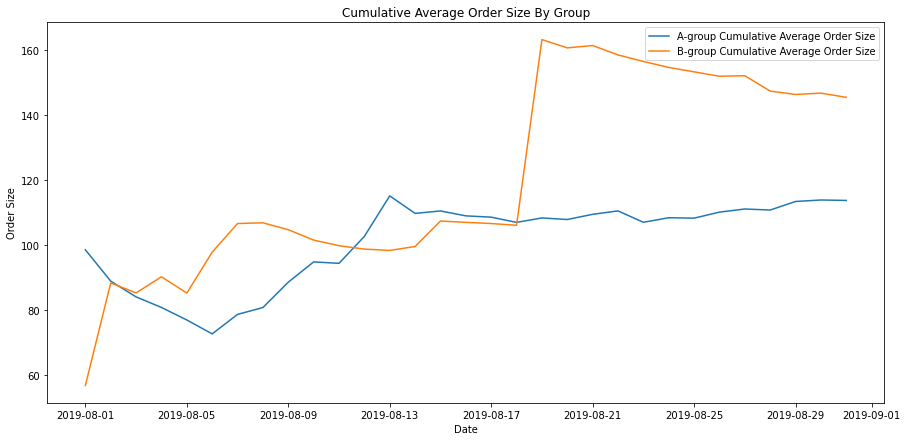

In [61]:
plt.figure(figsize=(15,7))
# Plotting the group A revenue graph 
plt.plot(orders_cumsum['date'], orders_cumsum['ave_oreder_size_A'], label='A-group Cumulative Average Order Size')

# Plotting the group B revenue graph 
plt.plot(orders_cumsum['date'], orders_cumsum['ave_oreder_size_B'], label='B-group Cumulative Average Order Size')

# naming graph and axes
plt.title('Cumulative Average Order Size By Group')
plt.xlabel('Date')
plt.ylabel('Order Size')
plt.legend();

The average order size was fluctuating but we ended up with 145 for B group and 114 for A group. Here we see the same outlier, the order worth ~ $20000 made on 2019-08-19.
And again group B leads.

<a id='Graph-the-relative-difference-in-cumulative-average-order-size-for-group-B-compared-with-group-A.-Make-conclusions-and-conjectures.'></a>

#### "Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures."

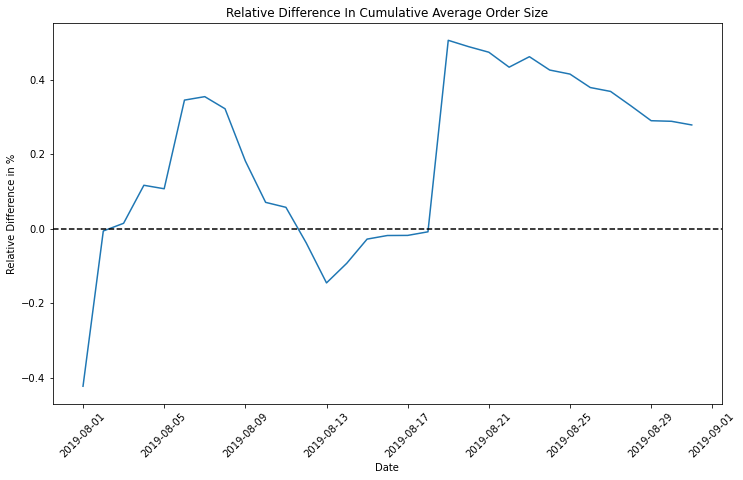

In [62]:
# plotting a relative difference graph for the average purchase sizes
plt.figure(figsize=(12,7))
plt.plot(orders_cumsum['date'], (orders_cumsum['ave_oreder_size_B']/orders_cumsum['ave_oreder_size_A']-1))

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45);

# naming graph and axes
plt.title('Relative Difference In Cumulative Average Order Size')
plt.xlabel('Date')
plt.ylabel('Relative Difference in %');

At several points the difference between the segments spikes. This means there must be some big orders and outliers! We'll find them later. By the end of test we see that average order size for group B is ~30% bigger then for group A.

<a id='Calculate-each-group`s-conversion-rate-as-the-ratio-of-orders-to-the-number-of-visits-for-each-day.-Plot-the-daily-conversion-rates-of-the-two-groups-and-describe-the-difference.-Draw-conclusions-and-make-conjectures.'></a>

#### "Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures."

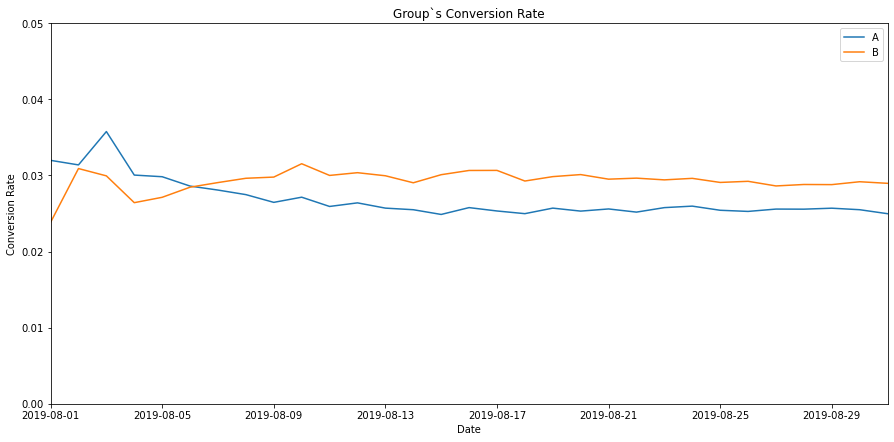

In [63]:
# creating a df with unique paired 'date' and 'group' values
datesGroups = orders[['date','group']].drop_duplicates()

# creating df with number of distinct orders, users and total revenue from orders in the test group up to the specified date, inclusive
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# merging previous tables
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.figure(figsize=(15,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
#changing graph scale to make it clear that conversion rate settled around its average value
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0, 0.05])

# naming graph and axes
plt.title('Group`s Conversion Rate')
plt.xlabel('Date')
plt.ylabel('Conversion Rate');

At the beginning segment A had a higher conversion rate, but segment B gradually gained and stabilized at an almost steady value.

<a id='Plot-a-scatter-chart-of-the-number-of-orders-per-user.-Make-conclusions-and-conjectures.'></a>

#### "Plot a scatter chart of the number of orders per user. Make conclusions and conjectures."

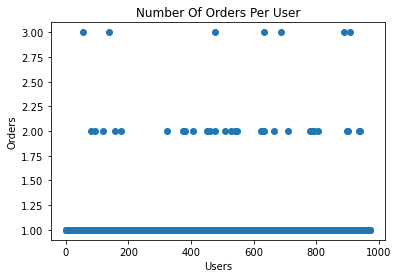

In [64]:
# finding the number of orders per user
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']

# the range of numbers from 0 to the number of observations in ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))

# plotting a scatter chart of the number of orders per user
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Number Of Orders Per User')
plt.xlabel('Users')
plt.ylabel('Orders');

There are very few users with 3 orders. These cases may turn out to be anomalies.

<a id='Calculate-the-95th-and-99th-percentiles-for-the-number-of-orders-per-user.-Define-the-point-at-which-a-data-point-becomes-an-anomaly.'></a>

#### "Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly."

In [65]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Not more than 5% users place more then one order, and not more than 1% of users made more than two. We define abnormal users here those who placed more then 2 orders, i.e. 3 orders.

<a id='Plot-a-scatter-chart-of-order-prices.-Make-conclusions-and-conjectures.'></a>

#### "Plot a scatter chart of order prices. Make conclusions and conjectures."

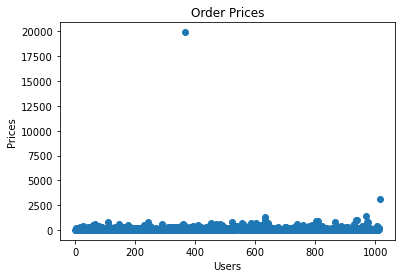

In [66]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Order Prices')
plt.xlabel('Users')
plt.ylabel('Prices');

The cost of all orders is below 2500, except for two orders worth $ 3000 and $ 20,000.

<a id='Calculate-the-95th-and-99th-percentiles-of-order-prices.-Define-the-point-at-which-a-data-point-becomes-an-anomaly.'></a>

#### "Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly."

In [67]:
print(np.percentile(orders['revenue'], [95, 99])) 

[414.275 830.3  ]


Not more than 5% users place orders that cost more than 414 dollar.
Not more than 1 % placed orders more expensive than $830.
Here we define orders over $ 830 as anomalies, i.e. as well as the number of orders per user 1%.

<a id='Find-the-statistical-significance-of-the-difference-in-conversion-between-the-groups-using-the-raw-data.-Make-conclusions-and-conjectures.'></a>

#### "Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures."

Let's formulate hypothesis for the test. 
        <li>H0 hypothesis: The difference in conversion between the groups A and B is not statistically significant. M1 = M2</li>
        <li>H1 hypothesis: The difference in conversion between the groups A and B is statistically significant. M1 != M2</li>
        <li>Alpha: we chose 5% commonly-accepted critical statistical significance level. 0.01 for our case is too precise.

In [68]:
# creating the variables where number of orders for users with at least one order will be specified.
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders'] 

# declaring the variables with users who made orders and the corresponding numbers of orders
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 


# calculating the statistical significance of the difference in conversion. Appling the Mann-Whitney test.
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.00551
0.160


The p-value considerably lower than 0.05 so we reject the null hypothesis. The raw data analysis showed that the groups' conversation rates have statistically significant differences. The relative conversion gain for group B compared with group A is 16%.

<a id='Find-the-statistical-significance-of-the-difference-in-average-order-size-between-the-groups-using-the-raw-data.-Make-conclusions-and-conjectures.'></a>

#### "Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures."

<li> H0 hypothesis: Average order size in groups A and B are equal to each other.</li>
<li> H1 hypothesis:  Average order size in groups A and B are different.</li>
<li> Alpha: we chose 5% commonly-accepted critical statistical significance level. 0.01 for our case is too precise.</li>

In [69]:
# calculating the statistical significance of the difference in average order size between the groups
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.431
0.278


The p-value is greater than 0.05, so there are not statistically significant differences between the groups average order size. The relative difference is 27,8%.

<a id='Find-the-statistical-significance-of-the-difference-in-conversion-between-the-groups-using-the-filtered-data.-Make-conclusions-and-conjectures.'></a>

#### "Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures."

<div class="alert alert-info"> 
    <ul>
        <li>H0 hypothesis: The distributions of the group A and group B are equal to each other. M1 = M2</li>
        <li>H1 hypothesis: The distributions of the two samples, the group A and group B, are different. M1 != M2</li>
        <li>Alpha: we chose 5% commonly-accepted critical statistical significance level. 0.01 for our case is too precise.</li>
    </ul>
</div>

In [70]:
# making data slices for users with three orders
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
# and users with orders for more than $830 
usersWithExpensiveOrders = orders[orders['revenue'] > 830]['visitorId']

# joining them into the abnormalUsers table, removing duplicates
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
# removing the anomalous visitors 
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 
display(abnormalUsers)
# printing the p-value to compare the conversion rates of the filtered groups 
print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

1099     148427295
33       249864742
58       611059232
949      887908475
744      888512513
1103    1164614297
1136    1307669133
425     1920142716
1196    2108080724
211     2108163459
287     2254456485
131     2254586615
347     2742574263
310     2988190573
409     3908431265
613     3931967268
416     3967698036
940     4003628586
743     4133034833
dtype: int64

0.00314
0.192


We defined anomalous users as those who placed more than 2 orders and with order size bigger than $830. 
Thereby we remove an 1 % or 16 anomalies.<br>
As happened with raw data we reached significance level. Based on filtered data group B is 19.2% better than Group A.

<a id='Find-the-statistical-significance-of-the-difference-in-average-order-size-between-the-groups-using-the-filtered-data.-Make-conclusions-and-conjectures.'></a>

#### "Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures."

<li>H0 hypothesis: The difference in average order size between the groups A and B is not statistically significant. M1 = M2</li>
<li>H1 hypothesis: The difference in average order size between the groups A and B is statistically significant. M1 != M2</li>
<li>Alpha: we chose 5% commonly-accepted critical statistical significance level. 0.01 for our case is too precise.</li>

In [71]:
# calculating the statistical significance for the difference in average order size
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.438
-0.014


The p-value is almost the same as for raw data but the relative difference is -3.2% vs 27,8% far raw data.

<a id='Make-a-decision-based-on-the-test-results.-The-possible-decisions-are:-1.-Stop-the-test,-consider-one-of-the-groups-the-leader.-2.-Stop-the-test,-conclude-that-there-is-no-difference-between-the-groups.-3.-Continue-the-test.'></a>

#### "Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test."

<b>From the proposed options we choose the 1st: Stop the test, consider one of the groups the leader.</b><br>
- On the graph of the difference in conversion between the groups we saw that segments stabilized around the mean.<br>
- We got results that despite the lack of statistical significance difference between the groups in terms of average purchase size, there is a significant difference in conversion between the groups A and B, according to both the raw and the filtered data. The relative conversion gain for group B compared with group A is 19.2% for filtered data.<br> 
So we can see that group is our leader and recomend to leave it.